# Лабораторна робота №4

### Студента групи МІТ-31 (підгрупа 2)

### Луніна Леоніда Олександровича
## Завдання


   1. Виконати вирішення задачі класифікації для 3 класів з набору даних [food101](https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip)
   2. Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за [списком](https://docs.google.com/spreadsheets/d/1G-R5Ln5zxAcCz50U43hn3Dk0DDU_qNy9V8_8XWZ87eA/edit#gid=0) (обчислені значення індексів вказані у даному документі у стовпчиках D:F) )
   3. Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab6.

In [22]:
import zipfile

zip_ref = zipfile.ZipFile("101_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [23]:
import os

for dirpath, dirnames, filenames in os.walk("101_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent\test'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\apple_pie'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\baby_back_ribs'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\baklava'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beef_carpaccio'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beef_tartare'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beet_salad'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beignets'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\bibimbap'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\bread_pudding'.
There are 0 directories and 250 images in '10

In [24]:
import pathlib
import numpy as np
train_dir = pathlib.Path("101_food_classes_10_percent/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in train_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['apple_pie' 'baby_back_ribs' 'baklava' 'beef_carpaccio' 'beef_tartare'
 'beet_salad' 'beignets' 'bibimbap' 'bread_pudding' 'breakfast_burrito'
 'bruschetta' 'caesar_salad' 'cannoli' 'caprese_salad' 'carrot_cake'
 'ceviche' 'cheese_plate' 'cheesecake' 'chicken_curry'
 'chicken_quesadilla' 'chicken_wings' 'chocolate_cake' 'chocolate_mousse'
 'churros' 'clam_chowder' 'club_sandwich' 'crab_cakes' 'creme_brulee'
 'croque_madame' 'cup_cakes' 'deviled_eggs' 'donuts' 'dumplings' 'edamame'
 'eggs_benedict' 'escargots' 'falafel' 'filet_mignon' 'fish_and_chips'
 'foie_gras' 'french_fries' 'french_onion_soup' 'french_toast'
 'fried_calamari' 'fried_rice' 'frozen_yogurt' 'garlic_bread' 'gnocchi'
 'greek_salad' 'grilled_cheese_sandwich' 'grilled_salmon' 'guacamole'
 'gyoza' 'hamburger' 'hot_and_sour_soup' 'hot_dog' 'huevos_rancheros'
 'hummus' 'ice_cream' 'lasagna' 'lobster_bisque' 'lobster_roll_sandwich'
 'macaroni_and_cheese' 'macarons' 'miso_soup' 'mussels' 'nachos'
 'omelette' 'onion_rings' 'oy

In [28]:
i1, i2, i3 = 10, 40, 70

classes = []
arr = (i1,i2,i3)
for i in range(len(class_names)):
    if i in arr:
        classes.append(class_names[i])

print(classes)

['bruschetta', 'french_fries', 'pad_thai']


Image shape: (512, 512, 3)


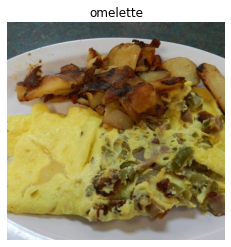

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

  # View a random image from the training dataset
img = view_random_image(target_dir="101_food_classes_10_percent/train/",
                        target_class="omelette")

In [31]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "101_food_classes_10_percent/train2/"
test_dir = "101_food_classes_10_percent/test2/"

print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="sparse")

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="sparse")

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="softmax")
])

# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model.fit(train_data_10_percent,
                        epochs=2,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Training images:
Found 225 images belonging to 3 classes.
Testing images:
Found 750 images belonging to 3 classes.
Epoch 1/2
8/8 [==============================] - 40s 5s/step - loss: 0.2211 - accuracy: 0.3333 - val_loss: 0.0264 - val_accuracy: 0.3333
Epoch 2/2
8/8 [==============================] - 33s 4s/step - loss: 0.2256 - accuracy: 0.3333 - val_loss: -0.0254 - val_accuracy: 0.3333


In [32]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 28090)            

<AxesSubplot:title={'center':'History ins_model'}, xlabel='epochs', ylabel='loss'>

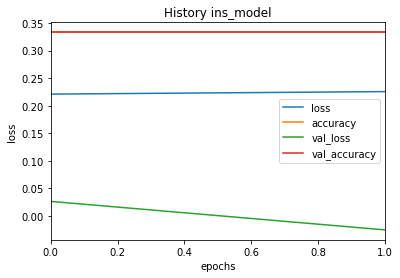

In [33]:
import pandas as pd
pd.DataFrame(history_1.history).plot(xlabel="epochs", 
ylabel="loss",title="History ins_model", xlim=(0,1))

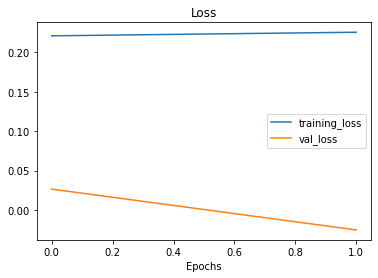

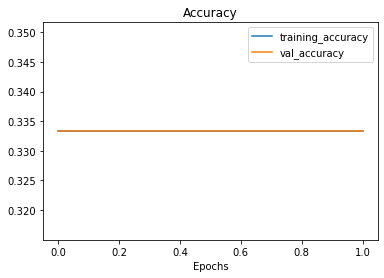

In [34]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

plot_loss_curves(history_1)

In [35]:
model.save('model.h5')